In [ ]:
!pip install simulation 

In [ ]:
from requests import kaggle  

# New Section  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Reservoir parameters
nx = 25
ny = 25
dx = 50
dy = 50
hz = 10
phi = 0.2
K = 50
mu = 1
ct = 1e-4
q = 50
p_init = 200
T = 365 # days

In [3]:
# Grid
grid = np.zeros((nx, ny))
grid[:,:] = p_init

# Properties
kx = K * phi / mu
ky = kx

trans_x = kx * dy / (dx)
trans_y = ky * dx / (dy)

c1 = ct * T / phi
c2 = q * T / (phi * dx * dy)

In [4]:
# Wells
inj = (0, 0)
prod = (nx-1, ny-1)

In [5]:
for t in range(T):

  #  Update cells
  for i in range(1,nx-1):
    for j in range(1, ny-1):
      grid[i,j] = grid[i,j] + c1 * (trans_x * (grid[i+1, j] - 2*grid[i,j] + grid[i-1,j]) +
                                   trans_y * (grid[i, j+1] - 2*grid[i,j] + grid[i,j-1]))

  # Injector
  grid[inj] -= c2

  # Producer
  grid[prod] += c2

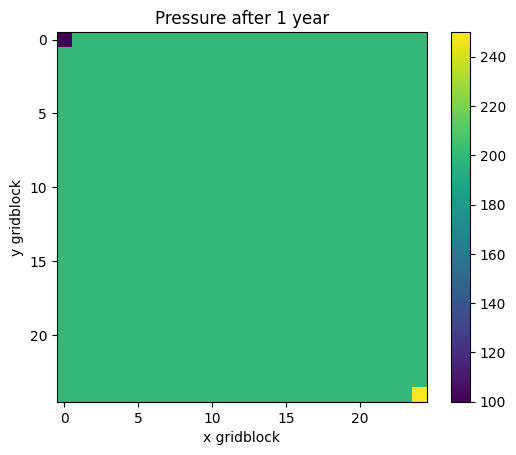

In [6]:
plt.imshow(grid, vmin=100, vmax=250)
plt.colorbar()
plt.title("Pressure after 1 year")
plt.xlabel("x gridblock")
plt.ylabel("y gridblock")
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Simulation parameters
dx = 1000
dy = 1000
h = 75
Kx = 0.015
U = 10
Vb = h*dx*dy
Q = 0.18
ct = 3.5e-6
B = 1
Bc = 1.127
Vcon = 5.615
q = 150
n = 10
Ax = h*dy
Tx = (Bc*Ax*Kx)/(U*B*dx)
v = (Vcon*B*U)/(Vb*Q*ct)
time=360 #days
# Time steps
dt_values = [3]
# Initialize pressure matrix
nt = 360 // min(dt_values)
P = np.zeros((nt+1, n))
P[0, :] = 6000
# Run simulation for each time step
for dt in dt_values:
  nt = 360 // dt
  for i in range(nt):
    P[i+1, 0] = P[i, 0] + v*((Tx*P[i, 1]) - (2*Tx*P[i, 0]) + (Tx*P[i, 0]))
    for j in range(1, 3):
      P[i+1, j] = P[i, j] + v*((Tx*P[i, j+1]) - (2*Tx*P[i, j]) + (Tx*P[i, j-1]))
      P[i+1, 3] = P[i, 3] + (-v*q) + v*((Tx*P[i, 4]) - (2*Tx*P[i, 3]) + (Tx*P[i, 2]))
      for j in range(4, 9):
        P[i+1, j] = P[i, j] + v*((Tx*P[i, j+1]) - (2*Tx*P[i, j]) + (Tx*P[i, j-1]))
        P[i+1, 9] = P[i, 9] + v*((Tx*P[i, 9]) - (2*Tx*P[i, 9]) + (Tx*P[i, 8]))
print(P)

[[6000.         6000.         6000.         ... 6000.
  6000.         6000.        ]
 [6000.         6000.         6000.         ... 6000.
  6000.         6000.        ]
 [6000.         6000.         5973.14262315 ... 6000.
  6000.         6000.        ]
 ...
 [3551.63246766 3415.06893192 3143.69433263 ... 4649.51201657
  4850.97759629 4950.7878108 ]
 [3531.05655353 3394.75706132 3123.88668907 ... 4633.66886649
  4835.66126712 4935.74948895]
 [3510.52042263 3374.48137897 3104.1082812  ... 4617.7964807
  4820.30744942 4920.66927998]]


Text(0.5, 1.0, 'Pressure Distribution in Reservoir')

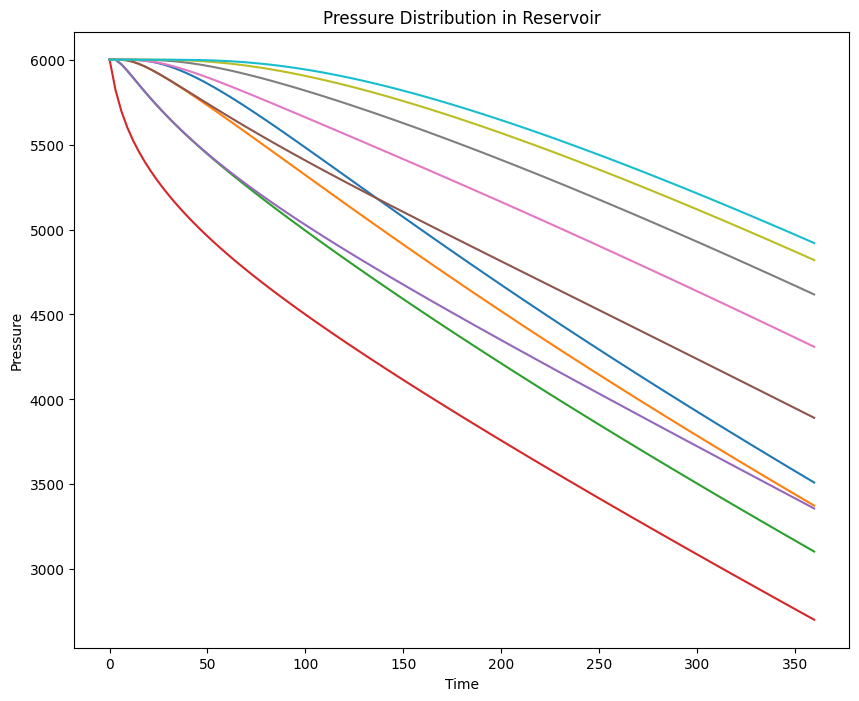

In [8]:
# Plot pressure distribution 2D
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
t = np.arange(0, 363, 3)
# plot pressure over time for each grid block
for i in range(n):
  plt.plot(t,P[:, i], label=f'Grid Block {i+1}')
# set axis labels and title
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure Distribution in Reservoir')
# add legend and show plot

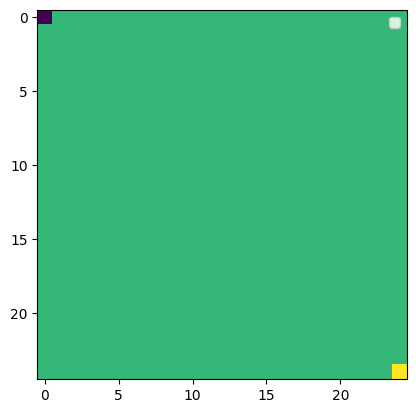

In [9]:
plt.legend()
plt.imshow(grid, vmin=100, vmax=250)

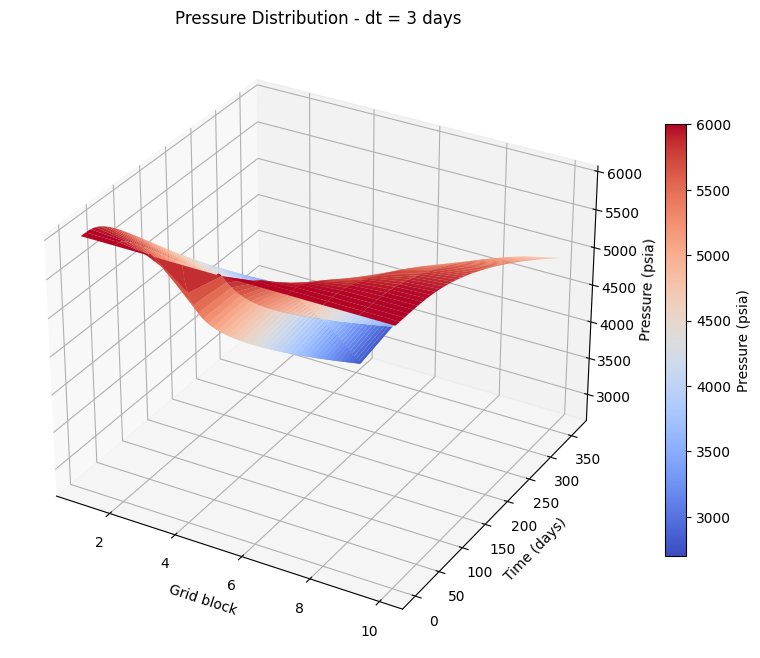

In [10]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
# Copy your code for computing P here
# Create the meshgrid
X, Y = np.meshgrid(np.arange(n)+1, t)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, P, cmap='coolwarm')
ax.set_xlabel('Grid block')
ax.set_ylabel('Time (days)')
ax.set_zlabel('Pressure (psia)')
ax.set_title(f'Pressure Distribution - dt = {dt} days')
# Add colorbar
mappable = plt.cm.ScalarMappable(cmap='coolwarm')
mappable.set_array(P)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.7)
cbar.ax.set_ylabel('Pressure (psia)')
plt.show()

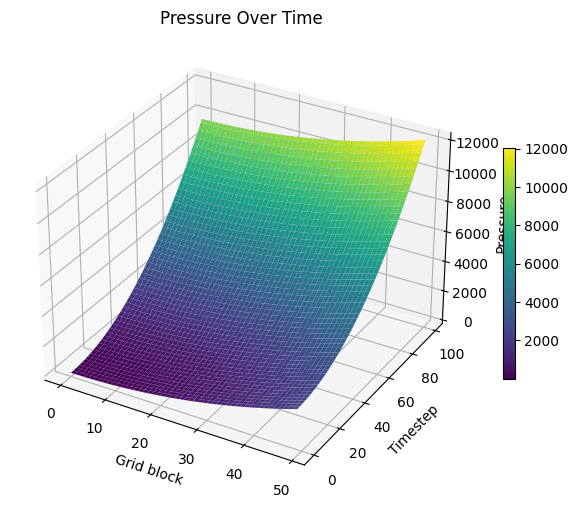

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
nx = 50
ny = 20
nt = 100

X = np.arange(nx)
Y = np.arange(nt)
X, Y = np.meshgrid(X, Y)

P = np.random.randn(nt, nx) # normally distributed
P += X**2 + Y**2 # add trend

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, P, cmap='viridis')

ax.set_title('Pressure Over Time')
ax.set_xlabel('Grid block')
ax.set_ylabel('Timestep')
ax.set_zlabel('Pressure')

fig.colorbar(surf, shrink=0.5)

plt.show()

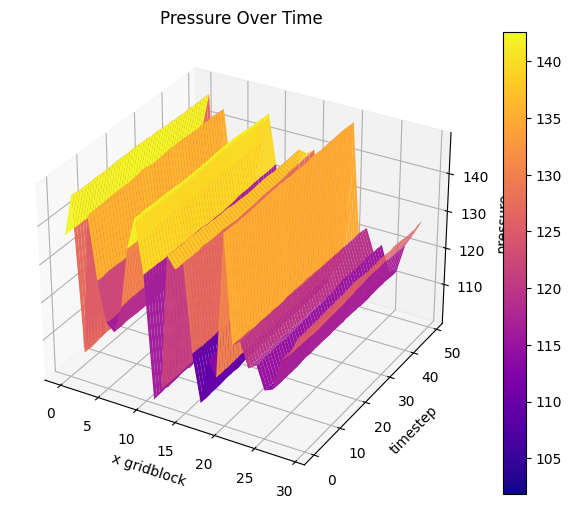

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulation parameters
nx = 30
ny = 20
nt = 50

# Generate heterogeneous permeability
perm = np.random.rand(nx, ny) * 100

# Initialize pressure
p = np.zeros((nt, nx, ny))
p[0] = np.random.rand(nx, ny) * 50 + 100

# Update pressure over time (without a specific simulation method)
for t in range(nt - 1):
    # You can modify the pressure field according to your requirements here
    # For simplicity, we will add a small random change to each grid block
    p[t + 1] = p[t] + np.random.randn(nx, ny) * 0.1

# Reshape for plotting
X = np.arange(nx)
Y = np.arange(nt)
X, Y = np.meshgrid(X, Y)
P = p  # Keep P with shape (nt, nx, ny) for correct plotting

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, P[:, :, 0], cmap='plasma', linewidth=0)

ax.set(title='Pressure Over Time',
       xlabel='x gridblock',
       ylabel='timestep',
       zlabel='pressure')

fig.colorbar(surf)

plt.show()
